In [1]:
# data analysis and wragling
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

# dates
import datetime

# text analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

[nltk_data] Downloading package punkt to C:\Users\Jason
[nltk_data]     Chong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pwd

'C:\\Users\\Jason Chong'

In [3]:
# import data

customerData = pd.read_csv("C:/Users/Jason Chong/Documents/Inside Sherpa Quantium/QVI_purchase_behaviour.csv")
transactionData = pd.read_csv("C:/Users/Jason Chong/Documents/Inside Sherpa Quantium/QVI_transaction_data.csv")

In [4]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
len(transactionData)

264836

In [7]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


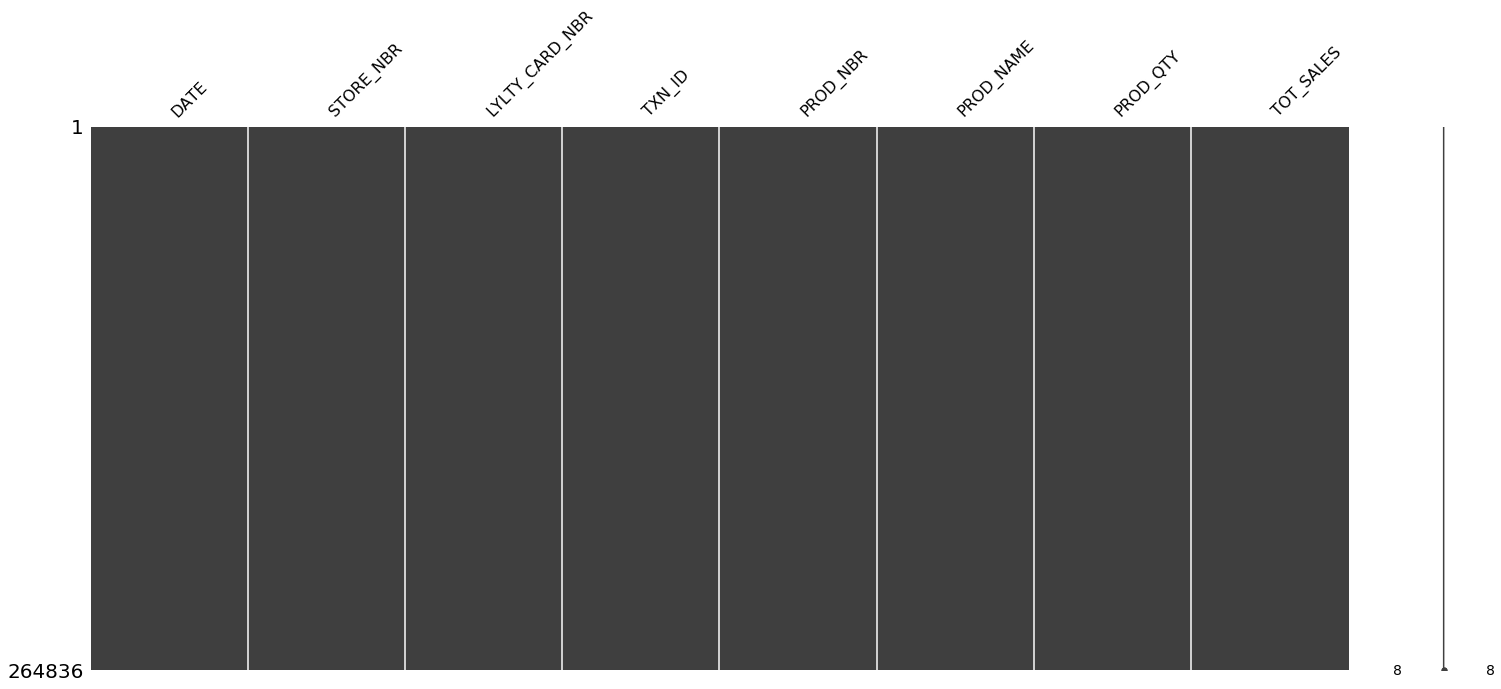

In [8]:
# Plot graph of missing values for 'transactionData'

missingno.matrix(transactionData)

# Comment: no missing numbers in transaction data 

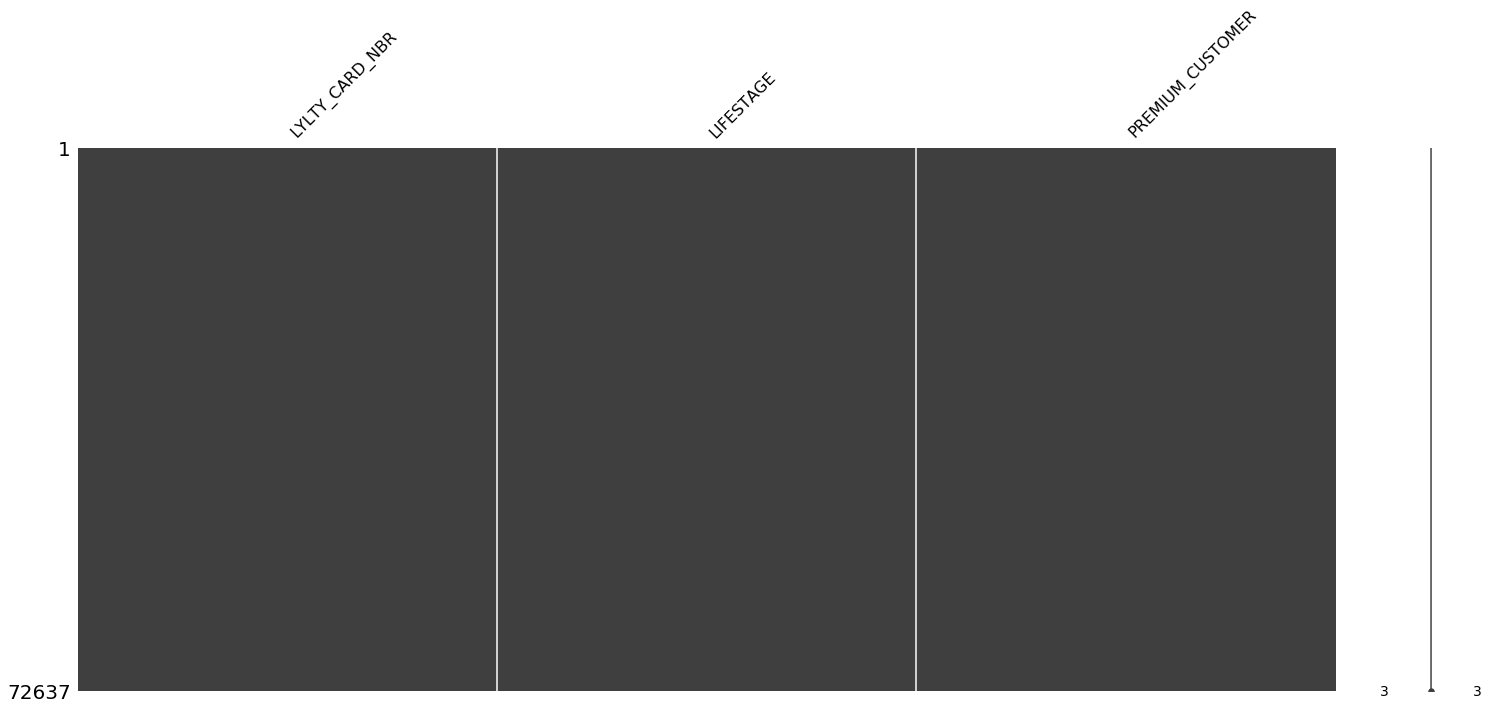

In [9]:
# Plot graph of missing values for 'customerData'

missingno.matrix(customerData)

# Comment: no missing values in customer data

In [10]:
# Now let's explore the features in both dataset starting with 'transactionData'

list(transactionData.columns)

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

In [11]:
transactionData.DATE.head()

0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64

In [12]:
# 'Date' is not in the right format

# Function that converts Excel integer into yyyy-mm-dd format
def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days = (xlserialdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

In [13]:
# Apply function to 'DATE' feature in 'transactionData' dataset

transactionData['newdate'] = transactionData.DATE.apply(xlseriesdate_to_datetime)

In [14]:
# Check the first 5 rows of the new feature

transactionData['newdate'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: newdate, dtype: datetime64[ns]

In [15]:
# Create 'year', 'month' and 'day' features form 'newdate'

transactionData['year'] = [t.year for t in pd.DatetimeIndex(transactionData.newdate)]
transactionData['month'] = [t.month for t in pd.DatetimeIndex(transactionData.newdate)]
transactionData['day'] = [t.day for t in pd.DatetimeIndex(transactionData.newdate)]

In [16]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,newdate,year,month,day
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,2018,10,17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2019,5,14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,2019,5,20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,2018,8,17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,2018,8,18


In [17]:
# Let's move on to 'PROD_NAME' feature

transactionData['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [18]:
# Extract weights out of 'PROD_NAME'

transactionData['pack_size'] = transactionData['PROD_NAME'].str.extract("(\d+)")
transactionData['pack_size'] = pd.to_numeric(transactionData['pack_size'])
transactionData['pack_size'].head()

0    175
1    175
2    170
3    175
4    150
Name: pack_size, dtype: int64

In [19]:
# Create text cleaning function for 'PROD_NAME' feature

def clean_text(text):
    text = text.lower() # to lowercase letters
    text = re.sub('[&/]', ' ', text) # remove special characters '&' and '/'
    text = re.sub('\d\w*', ' ', text) # remove product weights
    return text

# Apply text cleaning function to 'PROD_NAME' column

transactionData['PROD_NAME'] = transactionData['PROD_NAME'].apply(clean_text)

In [20]:
# Create one giant string and apply 'word_tokenize' to separate the words

prod_clean = transactionData['PROD_NAME']
string = ''.join(prod_clean)
prod_words = word_tokenize(string)

In [21]:
# Apply 'fdist' function which computes the frequency of each token and put it into a dataframe

word_freq = fdist(prod_words)
freq_df = pd.DataFrame(list(word_freq.items()), columns = ["Word","Frequency"]).sort_values(by = 'Frequency', ascending = False)

In [22]:
# Let's see the top 5 most frequent words

freq_df.head(10)

,Word,Frequency
10,chips,49770
16,kettle,40739
7,smiths,28572
6,cheese,27890
66,pringles,24743
28,salt,24719
34,doritos,24650
8,crinkle,23960
35,corn,22063
48,original,21560


In [23]:
# Drop rows with 'salsa' in 'PROD_NAME'

transactionData['PROD_NAME'] = transactionData['PROD_NAME'].apply(lambda x: x.lower())
transactionData = transactionData[~transactionData['PROD_NAME'].str.contains("salsa")]

In [24]:
# We have dropped 264836 - 246742 = 18094 rows in total

len(transactionData)

246742

In [25]:
# Let's have a look at our data table again

transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,newdate,year,month,day,pack_size
0,43390,1,1000,1,5,natural chip compny seasalt,2,6.0,2018-10-17,2018,10,17,175
1,43599,1,1307,348,66,ccs nacho cheese,3,6.3,2019-05-14,2019,5,14,175
2,43605,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,2019-05-20,2019,5,20,170
3,43329,2,2373,974,69,smiths chip thinly s cream onion,5,15.0,2018-08-17,2018,8,17,175
4,43330,2,2426,1038,108,kettle tortilla chpshny jlpno chili,3,13.8,2018-08-18,2018,8,18,150


In [26]:
# We shall explore 'PROD_QTY' and 'TOT_SALES' feature next

transactionData['PROD_QTY'].describe()

count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [27]:
# Max of 200 looks odd

transactionData['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [28]:
# We have two occurrences of 200 in the dataset
# Let's explore further

transactionData.loc[transactionData['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,newdate,year,month,day,pack_size
69762,43331,226,226000,226201,4,dorito corn chp supreme,200,650.0,2018-08-19,2018,8,19,380
69763,43605,226,226000,226210,4,dorito corn chp supreme,200,650.0,2019-05-20,2019,5,20,380


In [29]:
# Both these transactions have been made by the same person at the same store
# Let's see all the transactions this person has made by tracking his loyalty card number '226000'

transactionData.loc[transactionData['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,newdate,year,month,day,pack_size
69762,43331,226,226000,226201,4,dorito corn chp supreme,200,650.0,2018-08-19,2018,8,19,380
69763,43605,226,226000,226210,4,dorito corn chp supreme,200,650.0,2019-05-20,2019,5,20,380


In [30]:
# This person only made two transactions over the entire year so unlikely to be a retail customer 
# He or she is most likely purchasing for commercial purposes
# Safe to drop these this customer in both 'transactionData' and 'customerData' dataset

transactionData.drop(transactionData.index[transactionData['LYLTY_CARD_NBR'] == 226000], inplace = True)
customerData.drop(customerData.index[customerData['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [31]:
len(transactionData)

246740

In [32]:
# Now let's examine the number of transactions over time to see if there are any obvious data issues e.g. missing data

transactionData['newdate'].nunique()

364

In [33]:
# There seems to be one day missing out of the 365 days
# Let's count the number of transactions by date

transactionData['newdate'].value_counts().sort_index()

2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: newdate, Length: 364, dtype: int64

In [34]:
# Look for the missing date 
# Turns out that it was Christmas Day so it makes sense because most retail stores are closed on that day

pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transactionData['newdate'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [35]:
# Create a new dataframe which contains the the number of transactions for each date

a = pd.pivot_table(transactionData, values = 'TOT_SALES', index = 'newdate', aggfunc = 'count')
a.head()

,TOT_SALES
newdate,
2018-07-01,663
2018-07-02,650
2018-07-03,674
2018-07-04,669
2018-07-05,660


In [36]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
b

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0
...,...
2019-06-26,0
2019-06-27,0
2019-06-28,0
2019-06-29,0


In [37]:
c = a+b
c.fillna(0, inplace = True)

In [38]:
c.head()

,TOT_SALES
2018-07-01,663.0
2018-07-02,650.0
2018-07-03,674.0
2018-07-04,669.0
2018-07-05,660.0


In [39]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Sales Count'}, inplace = True)
c.head()

,Sales Count
Date,
2018-07-01,663.0
2018-07-02,650.0
2018-07-03,674.0
2018-07-04,669.0
2018-07-05,660.0


In [40]:
# Confirm the date where sales count equals to zero

c[c['Sales Count'] == 0]

,Sales Count
Date,
2018-12-25,0.0


In [41]:
c.reset_index(inplace = True)
c.head()

,Date,Sales Count
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0


In [42]:
c_december = c[(c.Date < "2019-01-01") & (c.Date > "2018-11-30")]
c_december.head()

,Date,Sales Count
153,2018-12-01,675.0
154,2018-12-02,655.0
155,2018-12-03,677.0
156,2018-12-04,666.0
157,2018-12-05,660.0


In [43]:
len(c_december)

31

In [44]:
c_december.reset_index(drop = True, inplace = True)
c_december.head()

,Date,Sales Count
0,2018-12-01,675.0
1,2018-12-02,655.0
2,2018-12-03,677.0
3,2018-12-04,666.0
4,2018-12-05,660.0


In [45]:
# Relabel 'Date'

c_december.Date = c_december.index + 1

C:\Users\Jason Chong\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
c_december.head()

,Date,Sales Count
0,1,675.0
1,2,655.0
2,3,677.0
3,4,666.0
4,5,660.0


In [47]:
c_december.tail()

,Date,Sales Count
26,27,690.0
27,28,669.0
28,29,666.0
29,30,686.0
30,31,650.0


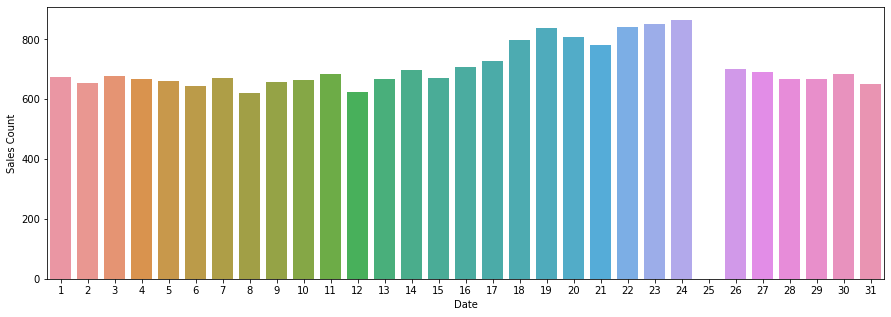

In [48]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Date', y ='Sales Count', data = c_december)

In [49]:
# Now that we are satisfied that the data no longer has outliers
# We can move on to creating other features
# At the beginning, we have already created a 'pack_size' feature
# Let's have a look again

transactionData['pack_size'].head()

0    175
1    175
2    170
3    175
4    150
Name: pack_size, dtype: int64

In [50]:
transactionData['pack_size'].unique()

# Comment: the largest size is 380g and the smallest size is 70g which seems reasonable

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70], dtype=int64)

In [51]:
# Compute number of transactions for each pack size

pack_count = transactionData[['pack_size', 'TOT_SALES']].groupby(['pack_size'], as_index = False).count()
pack_count.head()

,pack_size,TOT_SALES
0,70,1507
1,90,3008
2,110,22387
3,125,1454
4,134,25102


In [52]:
pack_count.rename(columns = {'pack_size':'Size', 'TOT_SALES':'Count'}, inplace = True)
pack_count.sort_values(by = ['Size'], inplace = True)
pack_count

,Size,Count
0,70,1507
1,90,3008
2,110,22387
3,125,1454
4,134,25102
5,135,3257
6,150,40203
7,160,2970
8,165,15297
9,170,19983


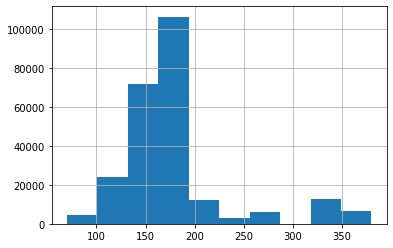

In [53]:
transactionData['pack_size'].hist()

In [54]:
part = transactionData['PROD_NAME'].str.partition()
transactionData['brand'] = part[0]
transactionData['brand'].head()

0    natural
1        ccs
2     smiths
3     smiths
4     kettle
Name: brand, dtype: object

In [55]:
transactionData['brand'].nunique()

28

In [56]:
transactionData['brand'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grain', 'doritos',
       'twisties', 'ww', 'thins', 'burger', 'ncc', 'cheezels', 'infzns',
       'red', 'pringles', 'dorito', 'infuzions', 'smith', 'grnwves',
       'tyrrells', 'cobs', 'french', 'rrd', 'tostitos', 'cheetos',
       'woolworths', 'snbts', 'sunbites'], dtype=object)

In [57]:
transactionData[transactionData.brand == 'french'].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,newdate,year,month,day,pack_size,brand
86,43604,115,115381,118981,29,french fries potato chips,1,3.0,2019-05-19,2019,5,19,175,french
680,43363,33,33019,29543,29,french fries potato chips,2,6.0,2018-09-20,2018,9,20,175,french
780,43337,39,39134,35434,29,french fries potato chips,2,6.0,2018-08-25,2018,8,25,175,french
1299,43450,69,69113,66543,29,french fries potato chips,2,6.0,2018-12-16,2018,12,16,175,french
1379,43362,73,73390,72741,29,french fries potato chips,2,6.0,2018-09-19,2018,9,19,175,french


In [58]:
# It looks like there are duplicates of the same brand e.g. 'ww' and 'woolworths', 'red' and 'rrd', 'natural' and 'ncc', 
# 'infuzions' and 'infzns', 'snbts' and 'sunbites', 'grain' and 'grnwves', 'smiths' and 'smith', 'doritos' and 'dorito'
# Let's rename them for consistency

transactionData['brand'].replace(['natural', 'ncc'], 'Natural', inplace = True)
transactionData['brand'].replace('ccs', 'CCs', inplace = True)
transactionData['brand'].replace(['smiths', 'smith'], 'Smiths', inplace = True)
transactionData['brand'].replace('kettle', 'Kettle', inplace = True)
transactionData['brand'].replace(['grain', 'grnwves'], 'Natural', inplace = True)
transactionData['brand'].replace(['doritos', 'dorito'], 'Doritos', inplace = True)
transactionData['brand'].replace('twisties', 'Twisties', inplace = True)
transactionData['brand'].replace(['ww', 'woolworths'], 'Woolworths', inplace = True)
transactionData['brand'].replace('thins', 'Thins', inplace = True)
transactionData['brand'].replace('burger', 'Burger Rings', inplace = True)
transactionData['brand'].replace('cheezels', 'Cheezels', inplace = True)
transactionData['brand'].replace(['infzns', 'infuzions'], 'Infuzions', inplace = True)
transactionData['brand'].replace(['red', 'rrd'], 'Red Rock Deli', inplace = True)
transactionData['brand'].replace('pringles', 'Pringles', inplace = True)
transactionData['brand'].replace('tyrrells', 'Tyrrells', inplace = True)
transactionData['brand'].replace('cobs', 'Cobs', inplace = True)
transactionData['brand'].replace('french', 'French Fries', inplace = True)
transactionData['brand'].replace('tostitos', 'Tostitos', inplace = True)
transactionData['brand'].replace('cheetos', 'Cheetos', inplace = True)
transactionData['brand'].replace(['snbts', 'sunbites'], 'Sunbites', inplace = True)

transactionData.brand.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Doritos', 'Twisties',
       'Woolworths', 'Thins', 'Burger Rings', 'Cheezels', 'Infuzions',
       'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs', 'French Fries',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [59]:
# Which brand had the most sales?

transactionData.groupby('brand').TOT_SALES.sum().sort_values(ascending = False)

brand
Kettle           390239.8
Doritos          226329.9
Smiths           217492.0
Pringles         177655.5
Infuzions         99047.6
Natural           93935.2
Thins             88852.5
Red Rock Deli     87607.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
Tyrrells          51647.4
Woolworths        41059.1
Cheezels          40029.9
CCs               18078.9
Cheetos           16884.5
Sunbites           9676.4
French Fries       7929.0
Burger Rings       6831.0
Name: TOT_SALES, dtype: float64

In [60]:
brand_sales = transactionData.groupby('brand', as_index = False).TOT_SALES.sum()
brand_sales.rename(columns = {'brand': 'Brand', 'TOT_SALES': 'Sales'}, inplace = True)
brand_sales

,Brand,Sales
0,Burger Rings,6831.0
1,CCs,18078.9
2,Cheetos,16884.5
3,Cheezels,40029.9
4,Cobs,70569.8
5,Doritos,226329.9
6,French Fries,7929.0
7,Infuzions,99047.6
8,Kettle,390239.8
9,Natural,93935.2


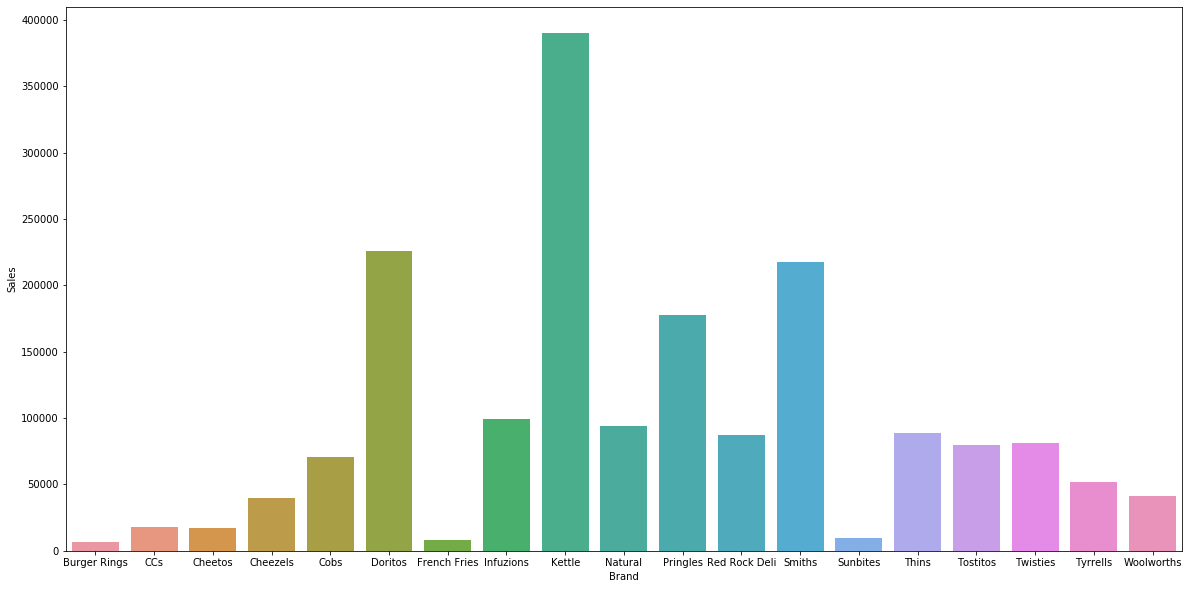

In [61]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Brand', y = 'Sales', data = brand_sales)

In [62]:
# Let's move on to 'customerData' dataset now

list(customerData.columns)

['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

In [63]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
